## Quertion 2: TDMA Algorithm

| 列1 | 列2 | 列3 | 列4 | 列5 | 列6 | 列7 |
|-----|-----|-----|-----|-----|-----|-----|
| b1| c1| 0 | 0 | 0 | t1| d1 |
|-a2| b2|-c2| 0 | 0 | t2| d2 |
| 0 |-a3| b3|-c3| 0 | t3| d3 |
| 0 | 0 | a4| b4|-c4| t4| d4 |
| 0 | 0 | 0 | a5| b5| t5| d5 |

#### 转换后

| 列1 | 列2 | 列3 | 列4 | 列5 | 列6 | 列7 |
|-----|-----|-----|-----|-----|-----|-----|
| 1 |-p1| 0 | 0 | 0 | t1| q1|
| 0 | 1 |-p2| 0 | 0 | t2| q2|
| 0 | 0 | 1 |-p3| 0 | t3| q3|
| 0 | 0 | 0 | 1 |-p4| t4| q4|
| 0 | 0 | 0 | 0 | 1 | t5| q5|

In [33]:
import numpy as np
def tdma(a, b, c, d):
    ## number nodes
    n = len(d)
    ## 第一行
    p = np.zeros(n - 1)
    q = np.zeros(n)
    p[0] = c[0] / b[0]
    q[0] = d[0] / b[0]

    ## 处理剩余行, 进行矩阵行变换, 变换为对角线为1的上对角矩阵
    for i in range(1, n - 1):
        denominator = b[i] - a[i] * p[i - 1]
        p[i] = c[i] / denominator
        q[i] = (d[i] + a[i] * q[i - 1]) / denominator
    ## 最后一行单独处理
    q[-1] = (d[-1] + a[-1] * q[-2]) / (b[-1] - a[-1] * p[-1])

    temp = np.zeros(n)
    temp[-1] = q[-1]
    for i in range(n - 2, -1, -1):
        temp[i] = q[i] + temp[i + 1] * p[i]
    return temp


In [ ]:
## 数值验证
# Analytical solution T{110.040, 130.088, 150.104, 170.088, 190.040}
# coefficient a{125, 125, 125, 125}
# coefficient b{375, 250, 250, 250, 375}
# coefficient c{125, 125, 125, 125}
# coefficient d{25004, 4, 4, 4, 50004}
a = np.full((4,), 125)
b = np.array([375, 250, 250, 250, 375])
c = np.full((4,), 125)
d = np.array([25004, 4, 4, 4, 50004])
temp = tdma(a, b, c, d)
print(temp)

[110.04  130.088 150.104 170.088 190.04 ]


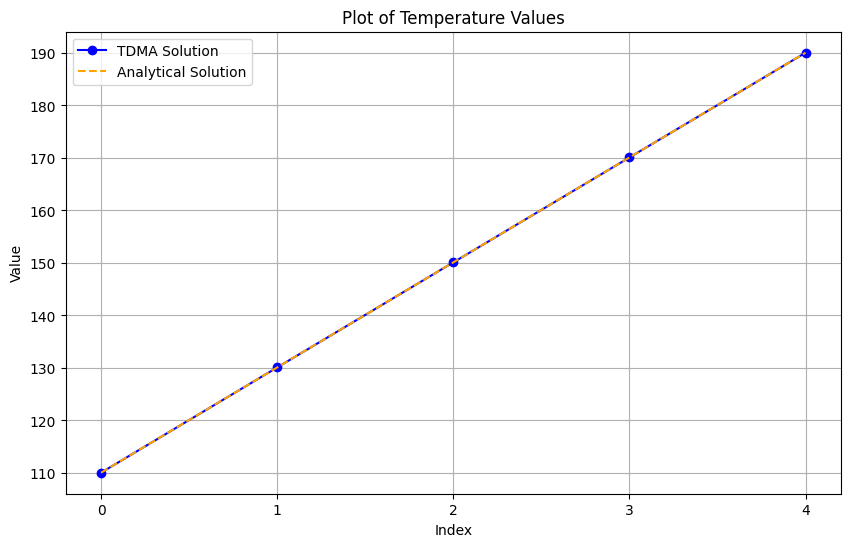

In [38]:

import matplotlib.pyplot as plt   

ref_temp = np.array([110.040, 130.088, 150.104, 170.088, 190.040])
x = np.arange(len(temp))  

# 绘制图形  
plt.figure(figsize=(10, 6))  
plt.plot(x, temp, marker='o', label='TDMA Solution', color='blue')  # TDMA结果
plt.plot(x, ref_temp, label='Analytical Solution', color='orange', linestyle='--')  # 理论参考解
plt.title('Plot of Temperature Values')  
plt.xlabel('Index')  
plt.ylabel('Value')  
plt.xticks(x)
plt.legend()
plt.grid()  
plt.show()

## Question3 Iteration Methods For Linear Solve

- 方程为：
*-4Tp + Te + Tw + Tn + Ts = 0*

- 节点1：*-4Tp + Tw + 5 + Tn + Tp = 0*
- 节点2：*-4Tp + Tw + Te + Tn + Tp = 0*

In [62]:
import numpy as np
## 9个网格节点的系数矩阵和右端项常数列向量
coeffs = np.zeros([9, 9])
c = np.zeros([9])

# 节点按照从左到右, 从下到上的顺序设置
coeffs[0, 0] = -3
coeffs[0, 1] = 1
coeffs[0, 3] = 1
c[0] = -5

coeffs[1, 0] = 1
coeffs[1, 1] = -3
coeffs[1, 2] = 1
coeffs[1, 4] = 1

coeffs[2, 1] = 1
coeffs[2, 2] = -3
coeffs[2, 5] = 1
c[2] = -2

coeffs[3, 0] = 1
coeffs[3, 3] = -4
coeffs[3, 4] = 1
coeffs[3, 6] = 1
c[3] = -20

coeffs[4, 1] = 1
coeffs[4, 3] = 1
coeffs[4, 4] = -4
coeffs[4, 5] = 1
coeffs[4, 7] = 1

coeffs[5, 2] = 1
coeffs[5, 4] = 1
coeffs[5, 5] = -4
coeffs[5, 8] = 1
c[5] = -11

coeffs[6, 3] = 1
coeffs[6, 6] = -4
coeffs[6, 7] = 1
c[6] = -37 - 45

coeffs[7, 4] = 1
coeffs[7, 6] = 1
coeffs[7, 7] = -4
coeffs[7, 8] = 1
c[7] = -35

coeffs[8, 5] = 1
coeffs[8, 7] = 1
coeffs[8, 8] = -4
c[8] = -24 - 30

In [50]:
temp = np.linalg.solve(coeffs, c)

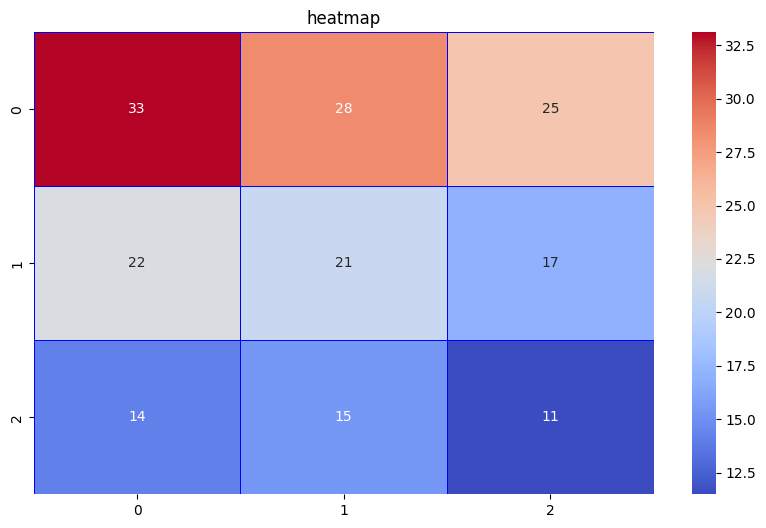

In [ ]:
import matplotlib.pyplot as plt
import seaborn
## 绘制温度分布图
temp = temp.reshape(3, 3)
## solver求解得到的温度分布与原图颠倒, 故使用temp_reshape存储修正后的温度分布
temp_reshape = np.zeros_like(temp)
temp_reshape[0, :] = temp[2, :]
temp_reshape[1, :] = temp[1, :]
temp_reshape[2, :] = temp[0, :]

plt.figure(figsize = (10, 6))
seaborn.heatmap(temp_reshape, annot=True, cmap = 'coolwarm', linewidths=0.5, linecolor='blue')

plt.title('heatmap')
plt.show()